# Sales Prediction Using Python
Sales are one of the most critical indicators of a business's success. With numerous factors affecting sales performance, such as advertising budget and promotional platforms, sales prediction becomes crucial for businesses to strategically plan their marketing efforts. By analyzing past sales data, we can build predictive models that estimate future sales based on the advertising expenditure across different channels like TV, radio, and newspapers.
- **TV**: Advertising budget spent on TV commercials.
- **Radio**: Advertising budget allocated to radio ads.
- **Newspaper**: Advertising budget for print media (newspapers).



---



## Data Undertanding


- **TV**: The amount of money spent on TV advertisements.
- **Radio**: The budget allocated to radio advertisements.
- **Newspaper**: The expenditure on newspaper advertisements.
- **Sales**: The total sales generated as a result of the advertising campaigns.

## Import Library

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load Dataset

In [4]:
df = pd.read_csv('/content/Advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


## Data Preprocessing

**Assesing Data**

In [8]:
print('Rows of Dataset : ',df.shape[0])
print('Columns of Dataset : ',df.shape[1])

Rows of Dataset :  200
Columns of Dataset :  5


In [10]:
df.isna().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [11]:
print('Data Duplicated :',df.duplicated().sum())

Data Duplicated : 0


**Cleaning dataset**

In [16]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Explore Dataset**

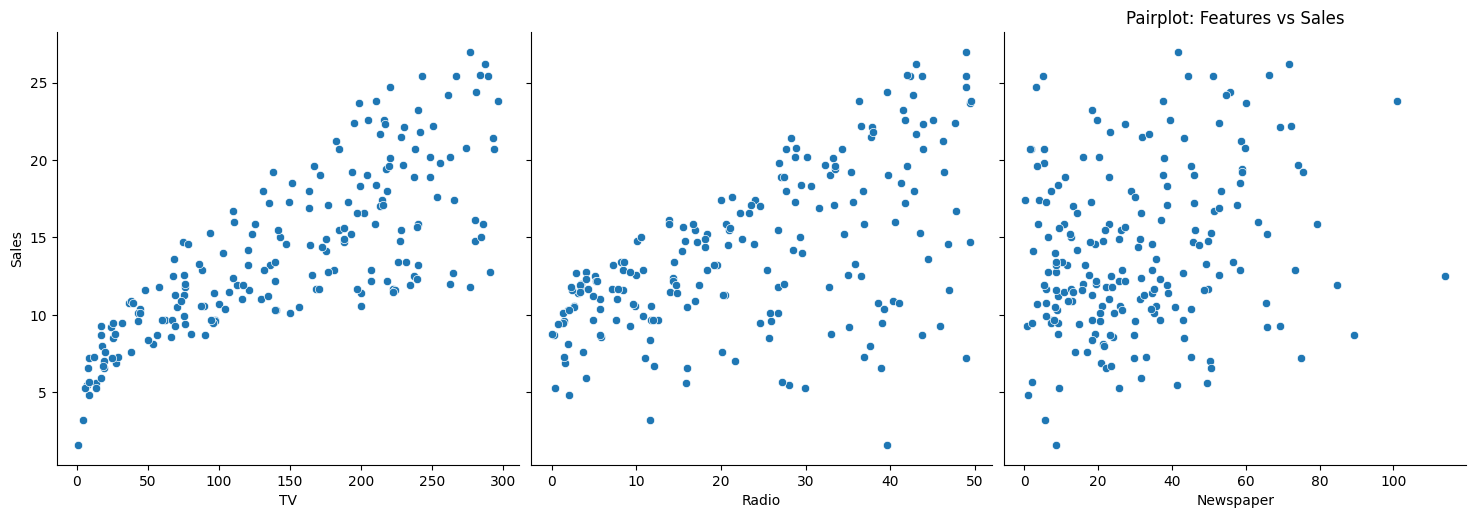

In [15]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.title("Pairplot: Features vs Sales")
plt.show()

## Model Building

In [24]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [25]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [33]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1.4607567168117594
Mean Squared Error (MSE): 3.174097353976106
Root Mean Squared Error (RMSE): 1.7815996615334506
R-squared (R2): 0.8994380241009119


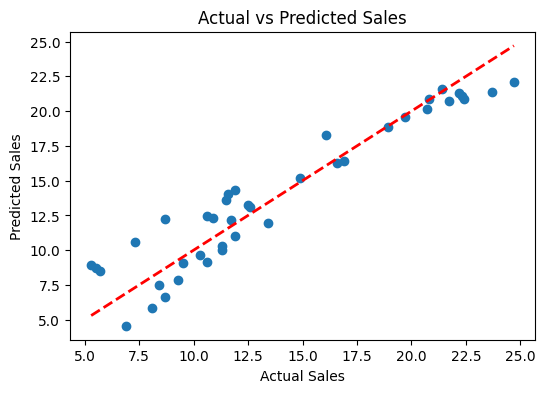

In [42]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

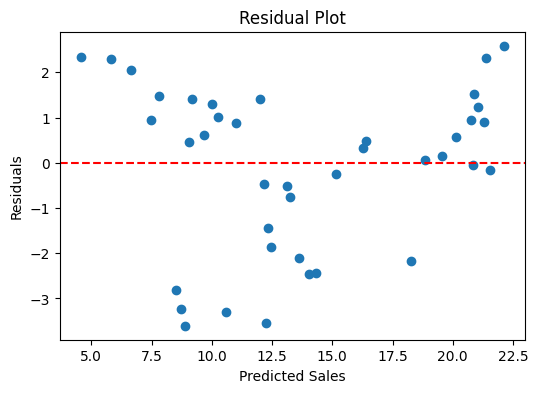

In [41]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

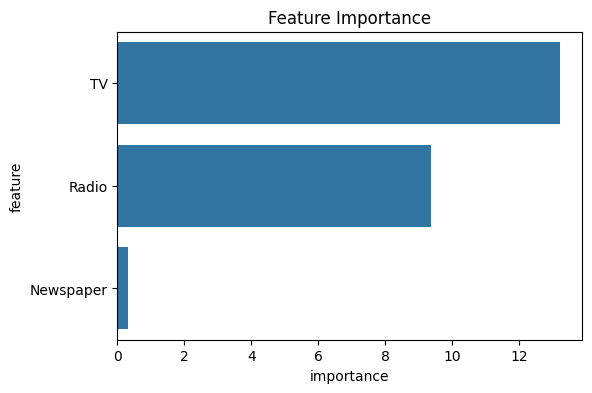

In [40]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.coef_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()